In [1]:
from tfConstrainedGauss import solve_me, random_cov_mat, \
    random_non_zero_idx_pairs, InputsME, convert_mat_to_mat_non_zero, convert_mat_non_zero_to_mat
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

# Test simple 3x3 matrix problem with MaxEnt approach

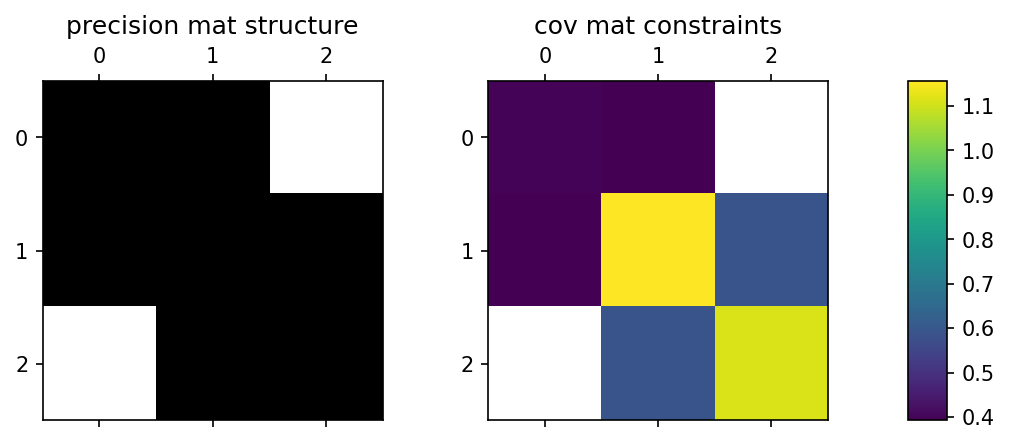

In [43]:
n = 3

# Non-zero idxs
non_zero_idx_pairs = [(0,0),(1,1),(2,2),(1,0),(2,1)]

# Random cov mat
cov_mat = random_cov_mat(n)

prec_mat_structure = convert_mat_non_zero_to_mat(
    n=n,
    non_zero_idx_pairs=non_zero_idx_pairs,
    mat_non_zero=np.full(len(non_zero_idx_pairs),1.0)
)

clear_cmap = ListedColormap(['white', 'none'])

gridspec = {'width_ratios': [1, 1, 0.1]}
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, gridspec_kw=gridspec, dpi=150)
fig.set_size_inches(8,3)

ax1.matshow(prec_mat_structure,cmap='Greys')
ax1.set_title("precision mat structure")

z2plot = ax2.matshow(cov_mat)
ax2.imshow(prec_mat_structure,cmap=clear_cmap)
ax2.set_title("cov mat constraints")

plt.colorbar(z2plot,cax=ax3)

## Train

In [45]:
target_cov_mat_non_zero = convert_mat_to_mat_non_zero(
    n=n,
    non_zero_idx_pairs=non_zero_idx_pairs,
    mat=cov_mat
)

inputs = InputsME(
    n=n,
    non_zero_idx_pairs=non_zero_idx_pairs,
    target_cov_mat_non_zero=target_cov_mat_non_zero,
    epochs=500,
    learning_rate=0.01,
    use_weighted_loss=False
)
results = solve_me(inputs)

Prec mat initial guess for non-zero elements [ 4.63088095  2.18474875  1.51066769 -2.15176308 -1.15752202]
Initial cov mat corresponding non-zero elements [0.94047696 3.35581411 2.63219628 1.5592966  2.57133239]
Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 2.5441
Epoch 2/500
1/1 [==============================] - 0s 3ms/step - loss: 1.6844
Epoch 3/500
1/1 [==============================] - 0s 3ms/step - loss: 1.1599
Epoch 4/500
1/1 [==============================] - 0s 2ms/step - loss: 0.8257
Epoch 5/500
1/1 [==============================] - 0s 2ms/step - loss: 0.6045
Epoch 6/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4530
Epoch 7/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3461
Epoch 8/500
1/1 [==============================] - 0s 2ms/step - loss: 0.2690
Epoch 9/500
1/1 [==============================] - 0s 2ms/step - loss: 0.2120
Epoch 10/500
1/1 [==============================] - 0s 3ms/step - loss: 0.1693
Epoch 11

In [46]:
results.report()

----- Results -----
Prec mat initial guess for non-zero elements:
[ 4.63088095  2.18474875  1.51066769 -2.15176308 -1.15752202]
-> Learned prec mat non-zero elements:
[ 4.8169546  2.3446665  1.6153544 -1.976847  -1.0050938]
Initial cov mat non-zero elements corresponding to initial prec mat guess:
[0.94047696 3.35581411 2.63219628 1.5592966  2.57133239]
-> Learned cov mat non-zero elements:
[0.39308793 1.10132253 1.04543453 0.45197565 0.68525671]
--> Target cov mat non-zero elements:
[0.3981517  1.15674365 1.11434246 0.39214034 0.59040013]
----- End results -----


## Plot learned cov matrix constraints

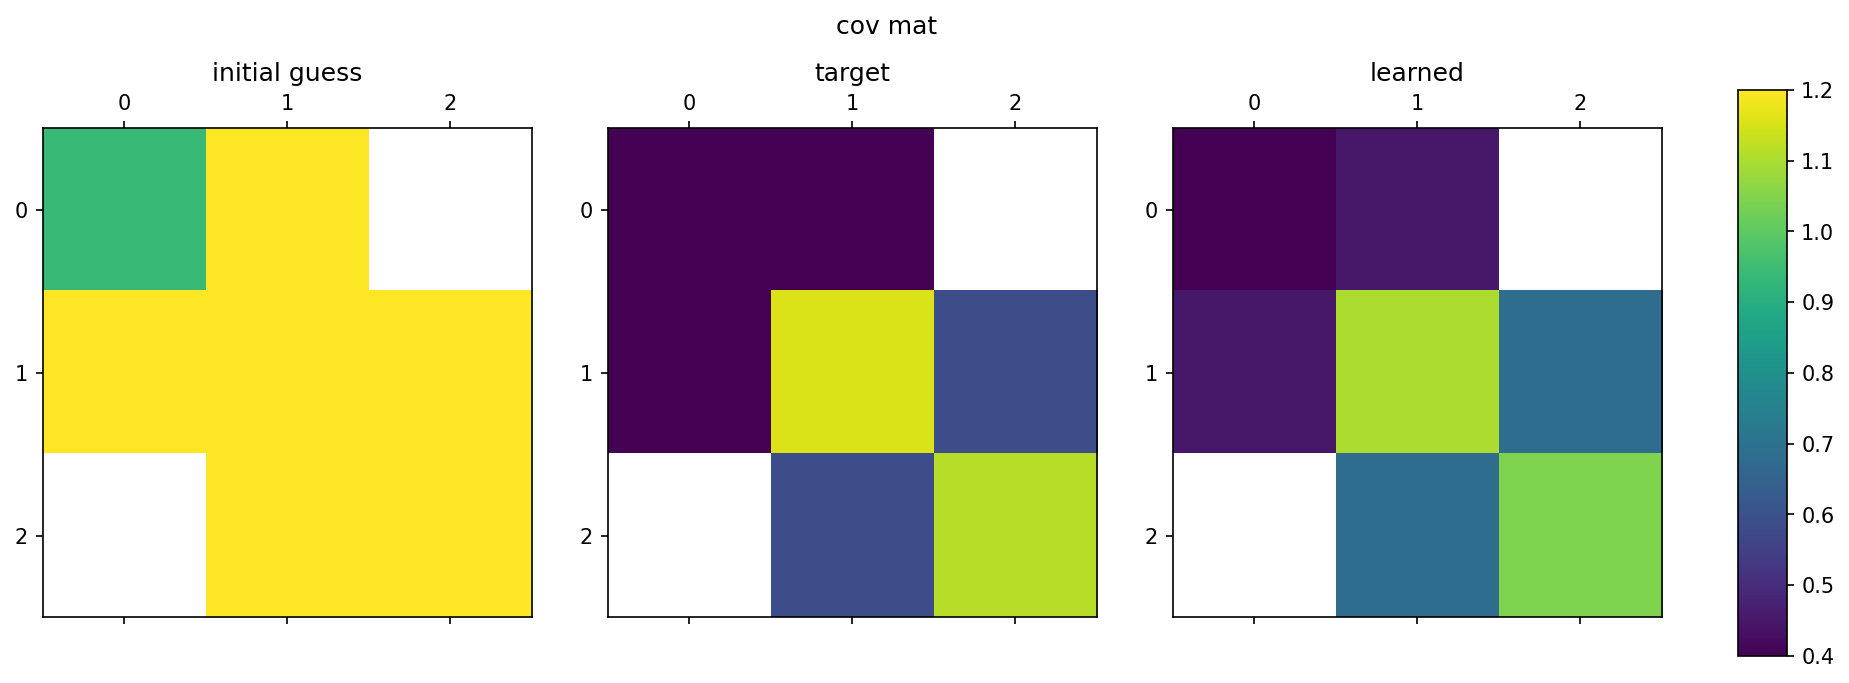

In [49]:
init_cov_mat_reconstructed = convert_mat_non_zero_to_mat(
    n=n,
    non_zero_idx_pairs=non_zero_idx_pairs,
    mat_non_zero=results.init_cov_mat_reconstructed_non_zero
)

low=0.4
high=1.2

clear_cmap = ListedColormap(['white', 'none'])

gridspec = {'width_ratios': [1, 1, 1, 0.1]}
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, gridspec_kw=gridspec, dpi=150)
fig.set_size_inches(15,5)
fig.suptitle("cov mat")

ax1.matshow(init_cov_mat_reconstructed,vmin=low,vmax=high)
ax1.imshow(prec_mat_structure,cmap=clear_cmap)
ax1.set_title('initial guess')

ax2.matshow(cov_mat,vmin=low,vmax=high)
ax2.imshow(prec_mat_structure,cmap=clear_cmap)
ax2.set_title('target')

z3plot = ax3.matshow(results.learned_cov_mat,vmin=low,vmax=high)
ax3.imshow(prec_mat_structure,cmap=clear_cmap)
ax3.set_title('learned')

plt.colorbar(z3plot,cax=ax4)

## Plot precision matrix learned and it's inverse = full covariance matrix

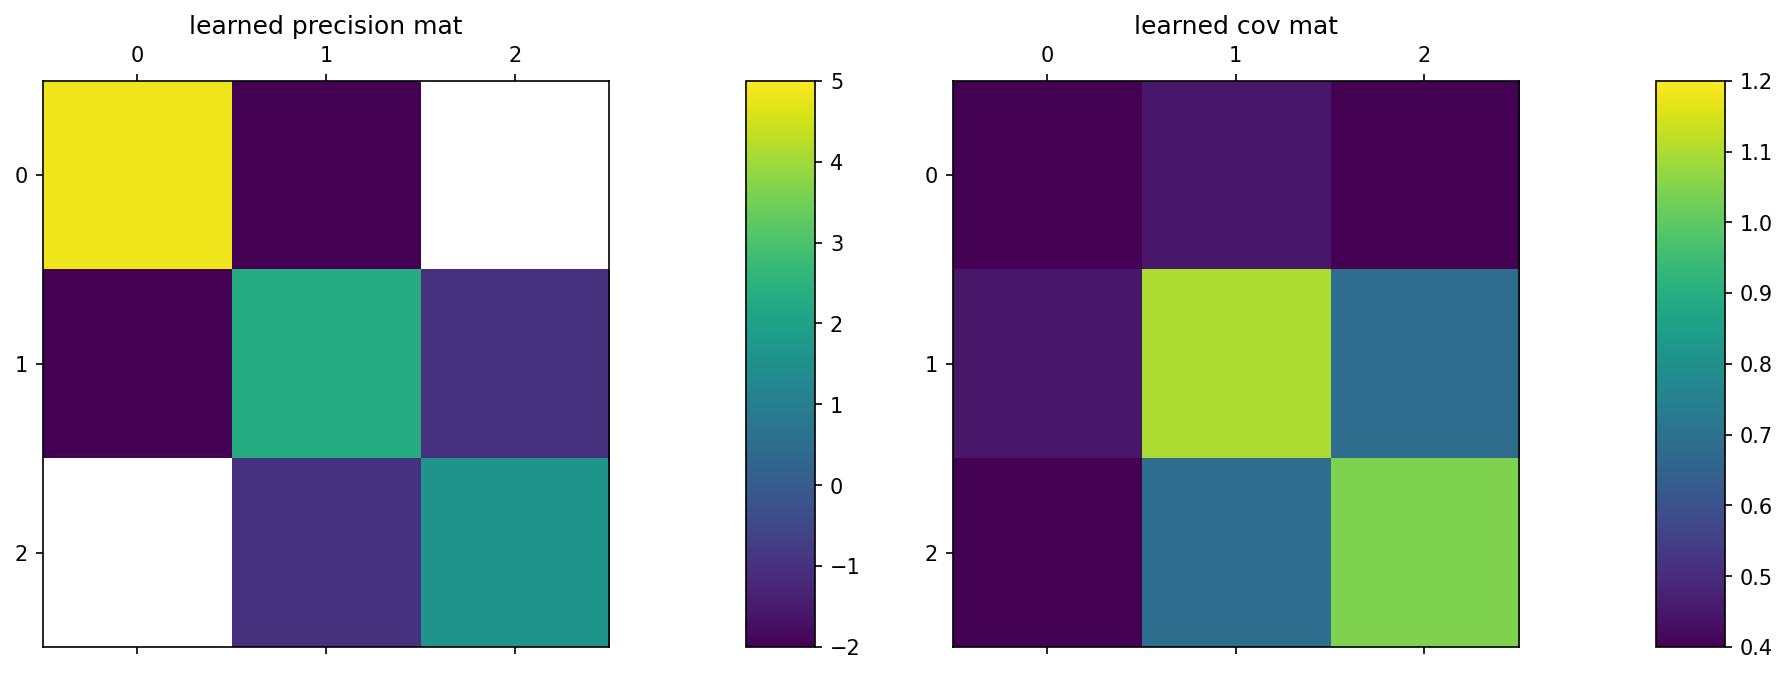

In [55]:
init_cov_mat_reconstructed = convert_mat_non_zero_to_mat(
    n=n,
    non_zero_idx_pairs=non_zero_idx_pairs,
    mat_non_zero=results.init_cov_mat_reconstructed_non_zero
)

clear_cmap = ListedColormap(['white', 'none'])

gridspec = {'width_ratios': [1, 0.1, 1, 0.1]}
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, gridspec_kw=gridspec, dpi=150)
fig.set_size_inches(15,5)

z1plot = ax1.matshow(results.learned_prec_mat,vmin=-2,vmax=5)
ax1.imshow(prec_mat_structure,cmap=clear_cmap)
ax1.set_title('learned precision mat')

plt.colorbar(z1plot,cax=ax2)

z3plot = ax3.matshow(results.learned_cov_mat,vmin=0.4,vmax=1.2)
ax3.set_title('learned cov mat')

plt.colorbar(z3plot,cax=ax4)